# new One - Final started sept 2024


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec

import json

In [23]:
# Opening JSON file
f = open("results/dt_1.json")
plot_data = json.load(f)
f.close()

f = open("results/rf_1.json")
plot_data_rf = json.load(f)
f.close()

f = open("results/SVM_1.json")
plot_data_svm = json.load(f)
f.close()

f = open("results/knn_1.json")
plot_data_knn = json.load(f)
f.close()

f = open("results/lm_1.json")
plot_data_lm = json.load(f)
f.close()

f = open("results/nb_1.json")
plot_data_nb = json.load(f)
f.close()


In [24]:
######

f = open("results/dt_2.json")
plot_data2 = json.load(f)
f.close()

f = open("results/rf_2.json")
plot_data_rf2 = json.load(f)
f.close()

f = open("results/svm_2.json")
plot_data_svm2 = json.load(f)
f.close()

f = open("results/knn_2.json")
plot_data_knn2 = json.load(f)
f.close()

f = open("results/lm_2.json")
plot_data_lm2 = json.load(f)
f.close()

f = open("results/nb_2.json")
plot_data_nb2 = json.load(f)
f.close()


In [25]:
######

f = open("results/dt_3.json")
plot_data3 = json.load(f)
f.close()

f = open("results/rf_3.json")
plot_data_rf3 = json.load(f)
f.close()

f = open("results/SVM_3.json")
plot_data_svm3 = json.load(f)
f.close()

f = open("results/knn_3.json")
plot_data_knn3 = json.load(f)
f.close()

f = open("results/lm_3.json")
plot_data_lm3 = json.load(f)
f.close()

f = open("results/nb_3.json")
plot_data_nb3 = json.load(f)
f.close()


In [26]:
######

f = open("results/dt_4.json")
plot_data4 = json.load(f)
f.close()

f = open("results/rf_4.json")
plot_data_rf4 = json.load(f)
f.close()

f = open("results/SVM_4.json")
plot_data_svm4 = json.load(f)
f.close()

f = open("results/knn_4.json")
plot_data_knn4 = json.load(f)
f.close()

f = open("results/lm_4.json")
plot_data_lm4 = json.load(f)
f.close()

f = open("results/nb_4.json")
plot_data_nb4 = json.load(f)
f.close()


In [27]:
######

f = open("results/dt_6.json")
plot_data5 = json.load(f)
f.close()

f = open("results/rf_6.json")
plot_data_rf5 = json.load(f)
f.close()

f = open("results/SVM_6.json")
plot_data_svm5 = json.load(f)
f.close()

f = open("results/knn_6.json")
plot_data_knn5 = json.load(f)
f.close()

f = open("results/lm_6.json")
plot_data_lm5 = json.load(f)
f.close()

f = open("results/nb_6.json")
plot_data_nb5 = json.load(f)
f.close()


In [28]:
def from_plot_data_to_df(plot_data):
    aggregated_data = {}
    for k, v in plot_data.items():
        aggregated_data[k] = {}
        for k1, v1 in v.items():
            if k1 not in ["aggregated", "cross"]:
                for k2, v2 in v1["results"].items():
                    # print(k2,v2)
                    if k2 in aggregated_data[k].keys():
                        aggregated_data[k][k2].append(v2)
                    else:
                        aggregated_data[k][k2] = [v2]
            if k1 == "cross":
                aggregated_data[k]["real_synth"] = []

                for k2, v2 in v1["real_synth"].items():
                    aggregated_data[k]["real_synth"].append(v2)
                aggregated_data[k]["synth_real"] = []

                for k2, v2 in v1["synth_real"].items():
                    aggregated_data[k]["synth_real"].append(v2)
                aggregated_data[k]["ratio_rs_sr"] = v1["aggregated"]

    return pd.DataFrame(aggregated_data)


df = from_plot_data_to_df(plot_data=plot_data)

In [29]:
# Flatten the DataFrame to have each list value in its own row
def melt_plot(xx):
    xx.iloc[-3:-1] = xx.iloc[-3:-1].map(lambda x: [sublist[0] for sublist in x])

    df_flattened = xx.apply(lambda x: x.explode()).reset_index(drop=False)
    df_flattened.set_index("index", inplace=True)
    df_melted = df_flattened.reset_index().melt(
        id_vars="index", var_name="X", value_name="Value"
    )

    return df_melted
    # Plotting the boxplot


In [30]:
def create_full_plot_data_dataset(jsondata=[], names=[]):
    melted_dfs = []

    for idx, jsondata_element in enumerate(jsondata):
        d1 = from_plot_data_to_df(plot_data=jsondata_element)
        d2 = melt_plot(d1)
        d2["source"] = names[idx]
        melted_dfs.append(d2)
    df_combined = pd.concat(melted_dfs, ignore_index=True)
    return df_combined


xx = create_full_plot_data_dataset(
    [plot_data, plot_data_knn, plot_data_lm, plot_data_nb, plot_data_rf, plot_data_svm],
    ["dt", "knn", "lm", "nb", "rf", "svm"],
)
xx.to_csv("test.csv")


In [31]:
xx = create_full_plot_data_dataset(
    [plot_data, plot_data_knn, plot_data_lm, plot_data_nb, plot_data_rf, plot_data_svm],
    ["dt", "knn", "lm", "nb", "rf", "svm"],
)
xx2 = create_full_plot_data_dataset(
    [
        plot_data2,
        plot_data_knn2,
        plot_data_lm2,
        plot_data_nb2,
        plot_data_rf2,
        plot_data_svm2,
    ],
    ["dt", "knn", "lm", "nb", "rf", "svm"],
)
xx3 = create_full_plot_data_dataset(
    [
        plot_data3,
        plot_data_knn3,
        plot_data_lm3,
        plot_data_nb3,
        plot_data_rf3,
        plot_data_svm3,
    ],
    ["dt", "knn", "lm", "nb", "rf", "svm"],
)
xx4 = create_full_plot_data_dataset(
    [
        plot_data4,
        plot_data_knn4,
        plot_data_lm4,
        plot_data_nb4,
        plot_data_rf4,
        plot_data_svm4,
    ],
    ["dt", "knn", "lm", "nb", "rf", "svm"],
)
xx6 = create_full_plot_data_dataset(
    [
        plot_data5,
        plot_data_knn5,
        plot_data_lm5,
        plot_data_nb5,
        plot_data_rf5,
        plot_data_svm5,
    ],
    ["dt", "knn", "lm", "nb", "rf", "svm"],
)


In [32]:
xxgrouped_all = [xx, xx2, xx3, xx4, xx6]

In [33]:
for df in xxgrouped_all:
    df["X"] = df["X"].str.replace("run ", "", regex=False)


/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_91859/2638593449.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xx_grouped.replace(
/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_91859/2638593449.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xx_grouped.replace(
/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_91859/2638593449.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result

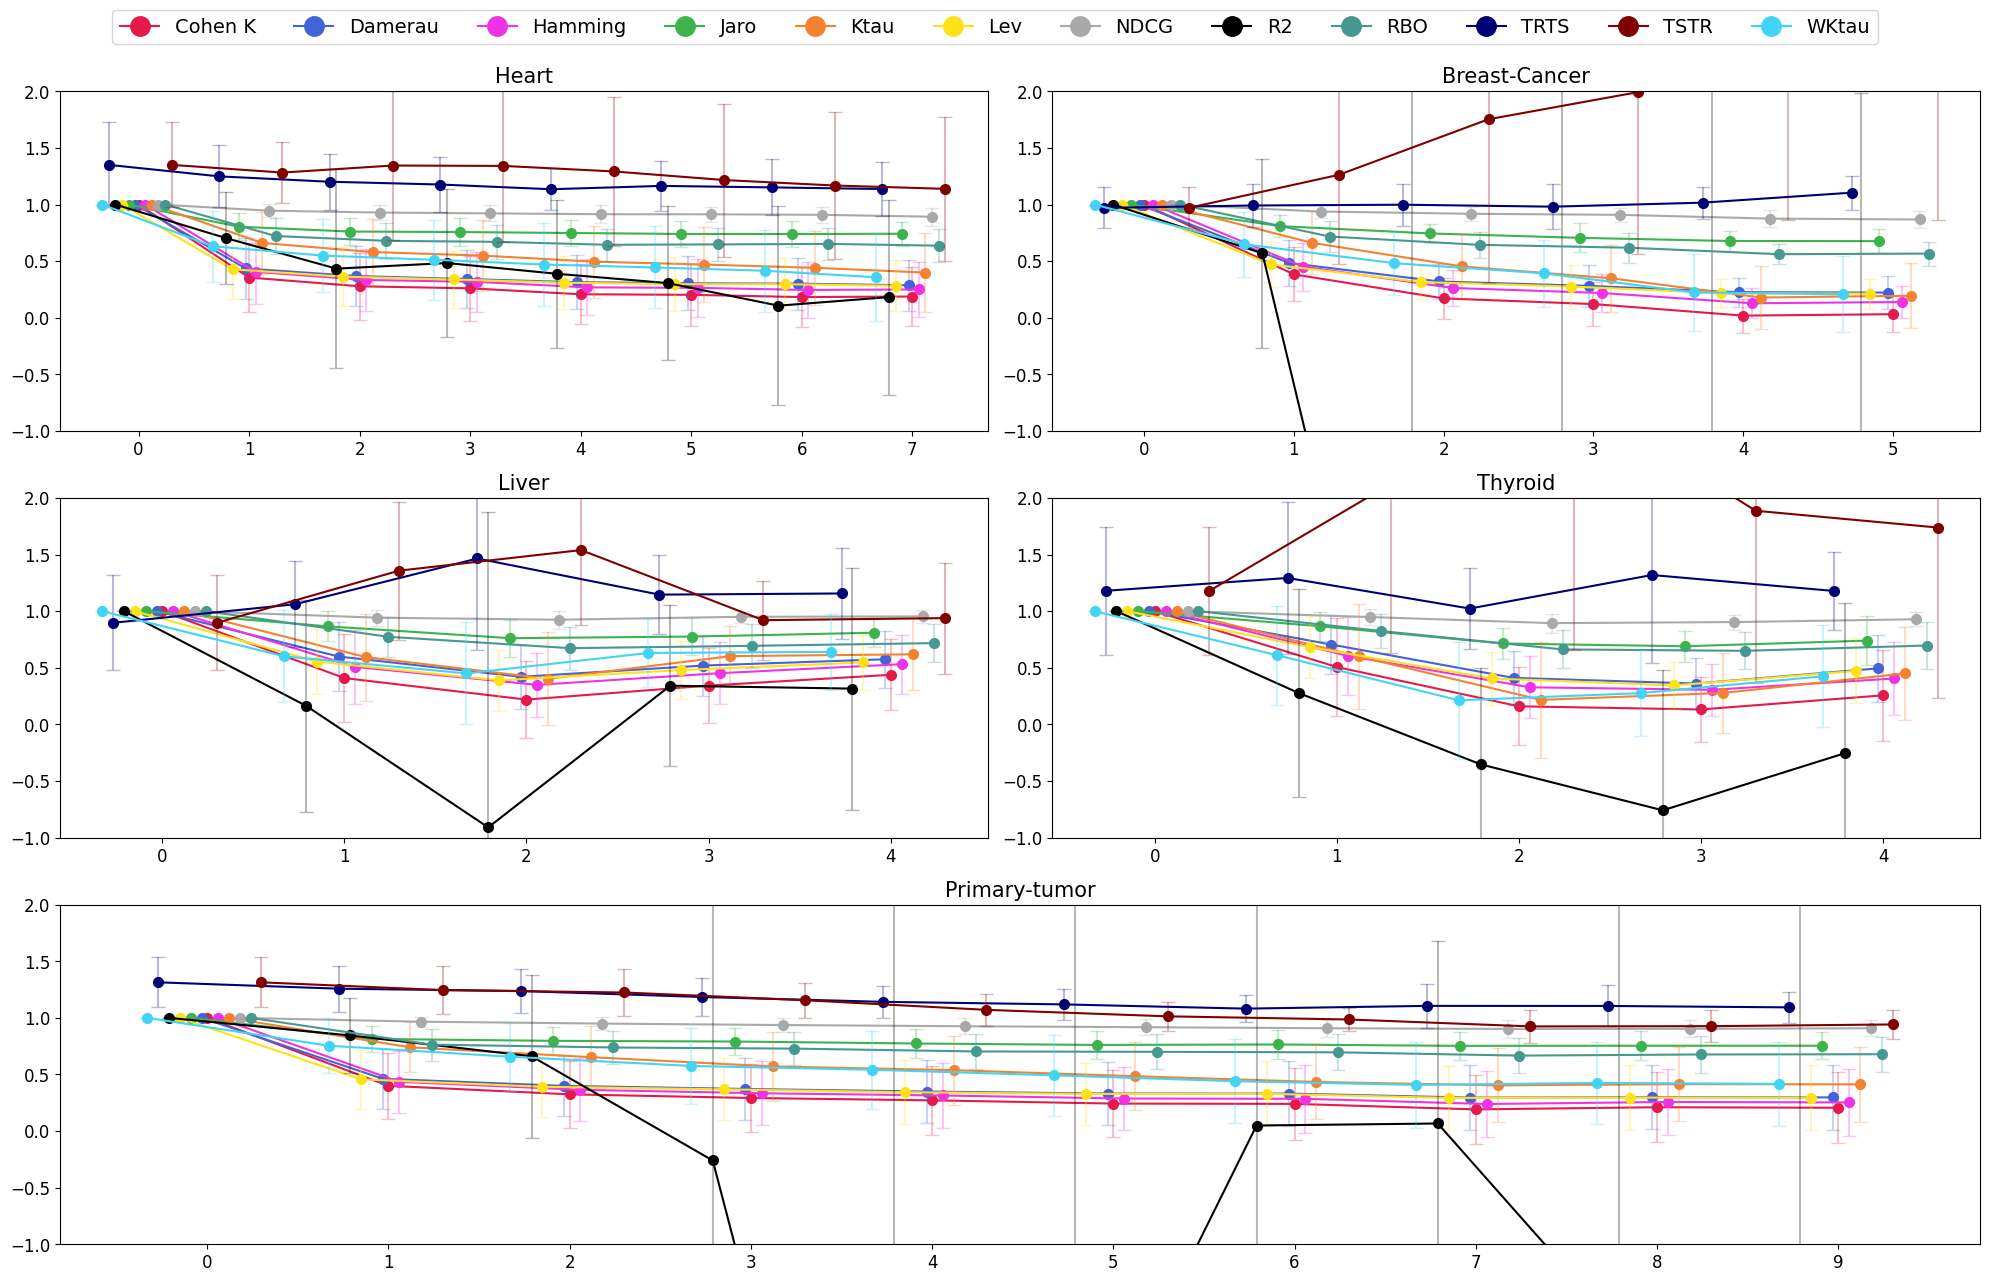

In [34]:
# Assuming 'xx_grouped' is your DataFrame for one plot
# Create a function to plot a single graph with jittered points and error bars
def plot_graph(ax, xx, title, color_map):
    # Assuming 'xx' is your DataFrame
    # Group by 'index' and 'X' to calculate mean and variance
    xx_grouped = (
        xx.groupby(["index", "X"])
        .agg(Mean=("Value", "mean"), Variance=("Value", "var"))
        .reset_index()
    )
    xx_grouped = xx_grouped[xx_grouped["index"] != "ratio_rs_sr"]
    xx_grouped["X"] = xx_grouped["X"].astype(int)

    # Convert string 'X' to numeric codes for plotting
    xx_grouped["X_numeric"] = pd.Categorical(xx_grouped["X"]).codes

    # Calculate error as the square root of variance (standard deviation) for error bars
    xx_grouped["Error"] = xx_grouped["Variance"] ** 0.5

    # Create a small jitter to spread the points horizontally
    unique_indices = xx_grouped["index"].unique()
    jitter_dict = {index: i * 0.1 for i, index in enumerate(unique_indices)}
    jitter_dict = {index: ((-1) ** i) * 0.1 for i, index in enumerate(unique_indices)}
    jitter_dict = {
        index: ((-1) ** i) * 0.03 * i for i, index in enumerate(unique_indices)
    }

    # Apply the jitter to the numeric 'X' values based on the 'index' group
    xx_grouped["X_jittered"] = xx_grouped["X_numeric"] + xx_grouped["index"].map(
        jitter_dict
    )
    xx_grouped.replace(
        {
            "synth_real": "TSTR",
            "real_synth": "TRTS",
            "ratio_rs_sr": "CC",
            "rbo": "RBO",
            "cross": "CC",
            "ndgc_score": "NDCG",
            "r2_score": "R2",
            "cohen_kappa_score": "Cohen K",
            "kendalltau": "Ktau",
            "levenshtein_normalized_similarity": "Lev",
            "jaro_winkler_normalized_similarity": "Jaro",
            "weightedtau": "WKtau",
            "damerau_levenshtein_normalized_similarity": "Damerau",
            "hamming_normalized_similarity": "Hamming",
        },
        inplace=True,
    )
    # xx_grouped.replace("run ", "", regex=False, inplace=True)
    # unique_indices = xx_grouped['index'].unique()
    # jitter_dict = {index: ((-1) ** i) * 0.1 for i, index in enumerate(unique_indices)}
    # xx_grouped['X_jittered'] = xx_grouped['X_numeric'] + xx_grouped['index'].map(jitter_dict)

    # Loop through each 'index' group to plot separately with jittered X values
    for i, (index, group_data) in enumerate(xx_grouped.groupby("index")):
        color = color_map.get(
            index, "#000000"
        )  # Use the color from the map, default to black ('#000000') if not found
        #   print(color)
        ax.plot(
            group_data["X_jittered"],
            group_data["Mean"],
            marker="o",
            label=index,
            color=color,
            markersize=7,
        )

        ax.errorbar(
            group_data["X_jittered"],
            group_data["Mean"],
            yerr=group_data["Error"],
            fmt="none",  # No additional line/marker style
            capsize=5,  # Add caps to the error bars
            alpha=0.28,
            color=color,  # Assign color from palette
        )
    # Set integer ticks
    unique_x = sorted(xx_grouped["X"].unique())
    ax.set_xticks(unique_x)
    ax.set_xticklabels(unique_x)
    # ax.set_xticks(xx_grouped["X_numeric"].unique())
    # ax.set_xticklabels(pd.Categorical(xx_grouped["X"]).categories)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.tick_params(axis="both", labelsize=12)  # Increase the font size of tick labels
    ax.set_ylim(-1, 2)


# Create a figure with 5 subplots (one row, five columns)
# fig, axes = plt.subplots(3, 2, figsize=(20, 13), sharey=True)
fig = plt.figure(figsize=(20, 13))
gs = gridspec.GridSpec(3, 2, figure=fig)

# Create subplots
axes = [
    fig.add_subplot(gs[0, 0]),  # Row 0, Col 0
    fig.add_subplot(gs[0, 1]),  # Row 0, Col 1
    fig.add_subplot(gs[1, 0]),  # Row 1, Col 0
    fig.add_subplot(gs[1, 1]),  # Row 1, Col 1
    fig.add_subplot(gs[2, :]),  # Row 2, spans both columns
]
titles = ["Heart", "Breast-Cancer", "Liver", "Thyroid", "Primary-tumor"]
# Color palette
# colors = sns.color_palette("Set1", n_colors=13)
color_map = {
    "TSTR": "#800000",  # Red-Orange
    "TRTS": "#000075",  # Green
    "CC": "#9A6324",  # Blue
    "RBO": "#469990",  # Pink
    "R2": "#000000",  # Pink
    "Cohen K": "#e6194B",  # Pink
    "Ktau": "#f58231",  # Pink
    "Lev": "#ffe119",  # Pink
    "Jaro": "#3cb44b",  # Pink
    "WKtau": "#42d4f4",  # Pink
    "Damerau": "#4363d8",  # Pink
    "Hamming": "#f032e6",  # Pink
    "NDCG": "#a9a9a9",  # Yellow
}
# Assuming you have 5 DataFrames (similar to xx_grouped), loop through them and plot
for i in range(5):
    x = i // 2
    # Generate a set of colors with at least 11 different colors

    # Print the colors
    # print(colors)
    y = i % 2
    # print(x,y)

    # Here, assume you have a different xx_grouped for each graph, e.g., xx_grouped_1, xx_grouped_2, etc.
    # Replace `xx_grouped` with the appropriate dataset for each plot
    plot_graph(axes[i], xxgrouped_all[i], titles[i], color_map)

# Add a single legend for all subplots (outside the plots)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title="",
    loc="upper center",
    bbox_to_anchor=(0.5, 0.99),
    fontsize="14",
    markerscale=2,
    ncol=13,
)

# Adjust layout to make space for the shared legend and titles
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjusts layout, leaving space for the legend
plt.savefig("Viz/multiple_datasets_2.png")

plt.show()

/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_91859/2075427757.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xx_grouped.replace(
/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_91859/2075427757.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xx_grouped.replace(
/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_91859/2075427757.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result

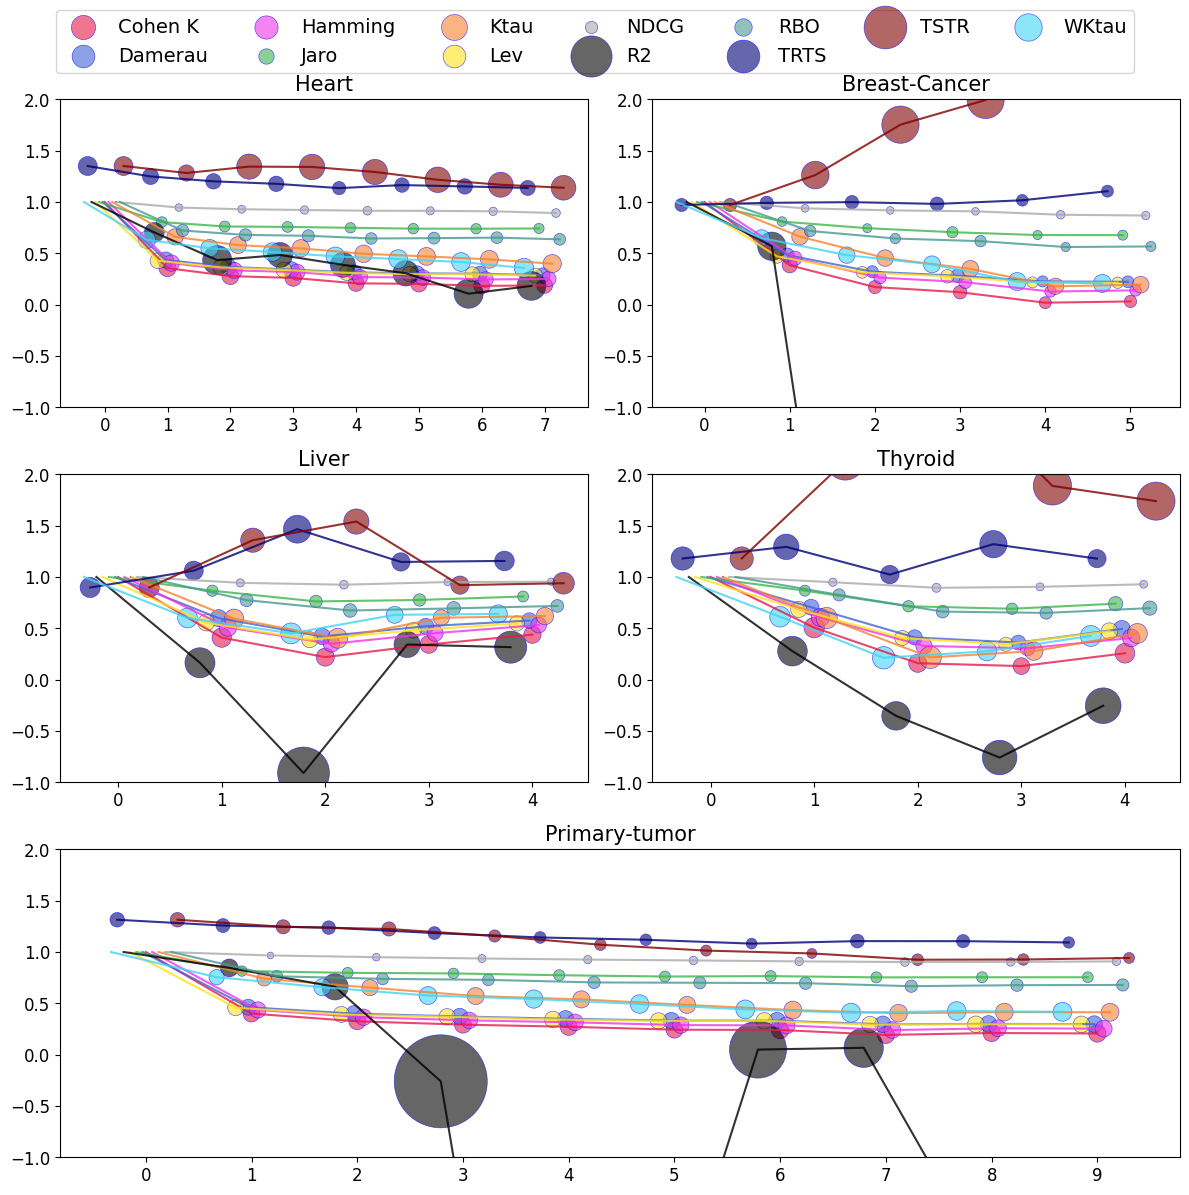

In [35]:
# Function to plot a single graph with jittered points, bubbles, and connecting lines
def plot_graph(ax, xx, title, color_map):
    # Group by 'index' and 'X' to calculate mean and variance
    xx_grouped = (
        xx.groupby(["index", "X"])
        .agg(Mean=("Value", "mean"), Variance=("Value", "var"))
        .reset_index()
    )
    xx_grouped = xx_grouped[xx_grouped["index"] != "ratio_rs_sr"]
    xx_grouped["X"] = xx_grouped["X"].astype(int)

    # Convert string 'X' to numeric codes for plotting
    xx_grouped["X_numeric"] = pd.Categorical(xx_grouped["X"]).codes

    # Calculate error as the square root of variance (standard deviation)
    xx_grouped["Error"] = xx_grouped["Variance"] ** 0.5

    # Apply jitter
    unique_indices = xx_grouped["index"].unique()
    jitter_dict = {
        index: ((-1) ** i) * 0.03 * i for i, index in enumerate(unique_indices)
    }
    xx_grouped["X_jittered"] = xx_grouped["X_numeric"] + xx_grouped["index"].map(
        jitter_dict
    )

    # Map index to more readable names
    xx_grouped.replace(
        {
            "synth_real": "TSTR",
            "real_synth": "TRTS",
            "ratio_rs_sr": "CC",
            "rbo": "RBO",
            "cross": "CC",
            "ndgc_score": "NDCG",
            "r2_score": "R2",
            "cohen_kappa_score": "Cohen K",
            "kendalltau": "Ktau",
            "levenshtein_normalized_similarity": "Lev",
            "jaro_winkler_normalized_similarity": "Jaro",
            "weightedtau": "WKtau",
            "damerau_levenshtein_normalized_similarity": "Damerau",
            "hamming_normalized_similarity": "Hamming",
        },
        inplace=True,
    )

    # Loop through each 'index' group to plot separately with jittered X values and bubble sizes
    for i, (index, group_data) in enumerate(xx_grouped.groupby("index")):
        color = color_map.get(index, "#000000")  # Default to black if color not found

        # Plot connecting lines
        ax.plot(
            group_data["X_jittered"],
            group_data["Mean"],
            color=color,
            linestyle="-",  # Solid line
            linewidth=1.5,
            alpha=0.8,
        )

        # Plot bubbles
        ax.scatter(
            group_data["X_jittered"],
            group_data["Mean"],
            s=group_data["Error"] * 500,  # Scale bubble size by the error value
            label=index,
            color=color,
            alpha=0.6,
            edgecolor="b",
            linewidth=0.5,
        )

    # Set integer ticks
    unique_x = sorted(xx_grouped["X"].unique())
    ax.set_xticks(unique_x)
    ax.set_xticklabels(unique_x)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.tick_params(axis="both", labelsize=12)
    ax.set_ylim(-1, 2)


# Create a figure with 5 subplots (one row, five columns)
# fig, axes = plt.subplots(3, 2, figsize=(20, 13), sharey=True)
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(3, 2, figure=fig)

# Create subplots
axes = [
    fig.add_subplot(gs[0, 0]),  # Row 0, Col 0
    fig.add_subplot(gs[0, 1]),  # Row 0, Col 1
    fig.add_subplot(gs[1, 0]),  # Row 1, Col 0
    fig.add_subplot(gs[1, 1]),  # Row 1, Col 1
    fig.add_subplot(gs[2, :]),  # Row 2, spans both columns
]
titles = ["Heart", "Breast-Cancer", "Liver", "Thyroid", "Primary-tumor"]
# Color palette
# colors = sns.color_palette("Set1", n_colors=13)
color_map = {
    "TSTR": "#800000",  # Red-Orange
    "TRTS": "#000075",  # Green
    "CC": "#9A6324",  # Blue
    "RBO": "#469990",  # Pink
    "R2": "#000000",  # Pink
    "Cohen K": "#e6194B",  # Pink
    "Ktau": "#f58231",  # Pink
    "Lev": "#ffe119",  # Pink
    "Jaro": "#3cb44b",  # Pink
    "WKtau": "#42d4f4",  # Pink
    "Damerau": "#4363d8",  # Pink
    "Hamming": "#f032e6",  # Pink
    "NDCG": "#a9a9a9",  # Yellow
}
# Assuming you have 5 DataFrames (similar to xx_grouped), loop through them and plot
for i in range(5):
    x = i // 2
    # Generate a set of colors with at least 11 different colors

    # Print the colors
    # print(colors)
    y = i % 2
    # print(x,y)

    # Here, assume you have a different xx_grouped for each graph, e.g., xx_grouped_1, xx_grouped_2, etc.
    # Replace `xx_grouped` with the appropriate dataset for each plot
    plot_graph(axes[i], xxgrouped_all[i], titles[i], color_map)

# Add a single legend for all subplots (outside the plots)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title="",
    loc="upper center",
    bbox_to_anchor=(0.5, 1),
    fontsize="14",
    markerscale=2,
    ncol=7,
)

# Adjust layout to make space for the shared legend and titles
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjusts layout, leaving space for the legend
plt.savefig("Viz/multiple_datasets_2_size.png")

plt.show()

In [36]:
def over_extract(
    grouped_df=[
        plot_data,
        plot_data_knn,
        plot_data_lm,
        plot_data_nb,
        plot_data_svm,
        plot_data_rf,
    ],
    dataset="heart",
    titles=["dt", "knn", "lm", "nb", "svm", "rf"],
    methodology="ratio",
):
    def extract_data_cc(plot_data, type, name, methodology="ratio"):
        ff = []
        for k, v in plot_data.items():
            for k2, v2 in v["cross"].items():
                if k2 == "aggregated":
                    continue

                for k3, v3 in v2.items():
                    # print(k3,v3)
                    if methodology == "ratio":
                        d = [k, k2, k3, v3[0], type, name]
                    if methodology == "real_values":
                        d = [k, k2, k3, v3[1], v3[2], type, name]

                    ff.append(d)
        return pd.DataFrame(ff)

    gg = []
    j = 0
    for i in grouped_df:
        # print(j)
        gg.append(extract_data_cc(i, dataset, titles[j], methodology=methodology))
        j += 1
    df_combined = pd.concat(gg, ignore_index=True)
    if methodology == "ratio":
        df_combined.columns = ["run", "type", "column", "value", "dataset", "method"]
    if methodology == "real_values":
        df_combined.columns = [
            "run",
            "type",
            "column",
            "value1",
            "value2",
            "dataset",
            "method",
        ]

    return df_combined


In [37]:
df_combined = over_extract()
df_combined_d2 = over_extract(
    grouped_df=[
        plot_data2,
        plot_data_knn2,
        plot_data_lm2,
        plot_data_nb2,
        plot_data_svm2,
        plot_data_rf2,
    ],
    dataset="thyroid",
)
df_combined_d2

df_combined_d3 = over_extract(
    grouped_df=[
        plot_data3,
        plot_data_knn3,
        plot_data_lm3,
        plot_data_nb3,
        plot_data_svm3,
        plot_data_rf3,
    ],
    dataset="breast-cancer",
)
df_combined_d3

df_combined_d4 = over_extract(
    grouped_df=[
        plot_data4,
        plot_data_knn4,
        plot_data_lm4,
        plot_data_nb4,
        plot_data_svm4,
        plot_data_rf4,
    ],
    dataset="liver",
)
df_combined_d4

df_combined_d5 = over_extract(
    grouped_df=[
        plot_data5,
        plot_data_knn5,
        plot_data_lm5,
        plot_data_nb5,
        plot_data_svm5,
        plot_data_rf5,
    ],
    dataset="primary-tumour",
)
df_combined_d5

,run,type,column,value,dataset,method
0,run 0,real_synth,class,1.953895,primary-tumour,dt
1,run 0,real_synth,age,1.746313,primary-tumour,dt
2,run 0,real_synth,sex,1.255693,primary-tumour,dt
3,run 0,real_synth,histologic-type,1.178010,primary-tumour,dt
4,run 0,real_synth,degree-of-diffe,1.367659,primary-tumour,dt
...,...,...,...,...,...,...
2155,run 9,synth_real,neck,0.940698,primary-tumour,rf
2156,run 9,synth_real,supraclavicular,1.057276,primary-tumour,rf
2157,run 9,synth_real,axillar,1.076851,primary-tumour,rf
2158,run 9,synth_real,mediastinum,0.915192,primary-tumour,rf


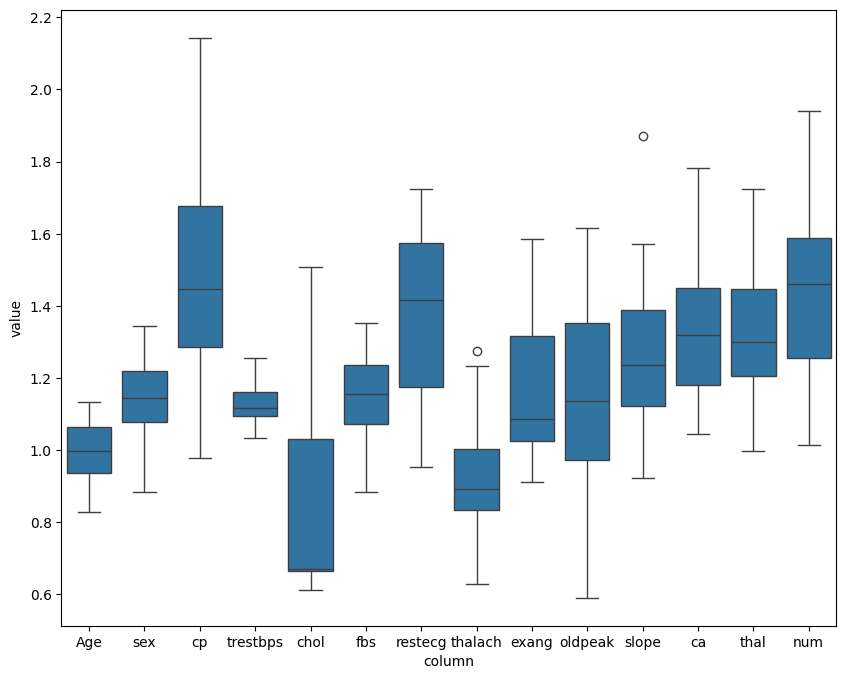

In [38]:
plt.figure(figsize=(10, 8))
df_rs = df_combined[df_combined["type"] == "real_synth"]
sns.boxplot(x="column", y="value", data=df_rs, dodge=True)
# Show the plot
plt.show()

In [39]:
full_df_combined = pd.concat(
    [df_combined_d5, df_combined, df_combined_d2, df_combined_d3, df_combined_d4]
)
result = (
    full_df_combined.groupby(["column", "method", "type"])["value"]
    .agg(["mean", "std"])
    .reset_index()
)
result

,column,method,type,mean,std
0,Age,dt,real_synth,0.937740,0.060152
1,Age,dt,synth_real,1.187394,0.129986
2,Age,knn,real_synth,0.962014,0.072670
3,Age,knn,synth_real,1.218104,0.145315
4,Age,lm,real_synth,0.995025,0.099787
...,...,...,...,...,...
631,trestbps,nb,synth_real,1.180350,0.130012
632,trestbps,rf,real_synth,1.105305,0.037338
633,trestbps,rf,synth_real,1.148325,0.098462
634,trestbps,svm,real_synth,1.114771,0.070796


In [40]:
result = (
    full_df_combined.groupby(["dataset", "column", "type"])["value"]
    .agg(["mean", "std"])
    .reset_index()
)

result["mean"] = result["mean"].round(2)
result["std"] = result["std"].round(2)
result

,dataset,column,type,mean,std
0,breast-cancer,Selector,real_synth,1.23,0.17
1,breast-cancer,Selector,synth_real,1.06,0.25
2,breast-cancer,alkphos,real_synth,0.74,0.01
3,breast-cancer,alkphos,synth_real,0.82,0.05
4,breast-cancer,drinks,real_synth,0.98,0.19
...,...,...,...,...,...
105,thyroid,Single_Epithelial_Cell_Size,synth_real,1.78,0.93
106,thyroid,Uniformity_of_Cell_Shape,real_synth,0.78,0.13
107,thyroid,Uniformity_of_Cell_Shape,synth_real,2.69,2.75
108,thyroid,Uniformity_of_Cell_Size,real_synth,0.79,0.18


In [41]:
result = (
    full_df_combined.groupby(["dataset", "column", "method"])["value"]
    .agg(["mean", "std"])
    .reset_index()
)

result["mean"] = result["mean"].round(2)
result["std"] = result["std"].round(2)
result

,dataset,column,method,mean,std
0,breast-cancer,Selector,dt,1.10,0.22
1,breast-cancer,Selector,knn,1.13,0.23
2,breast-cancer,Selector,lm,1.10,0.22
3,breast-cancer,Selector,nb,1.21,0.23
4,breast-cancer,Selector,rf,1.19,0.26
...,...,...,...,...,...
325,thyroid,Uniformity_of_Cell_Size,knn,1.80,2.54
326,thyroid,Uniformity_of_Cell_Size,lm,1.82,2.52
327,thyroid,Uniformity_of_Cell_Size,nb,1.84,2.43
328,thyroid,Uniformity_of_Cell_Size,rf,1.83,2.52


In [42]:
# Assuming 'result' is your DataFrame with 'name', 'mean', and 'std' columns, plus other columns you want to keep
# Create a new column where mean and std are concatenated with a space
result["concatenated"] = result.apply(
    lambda row: f"{row['mean']} ({row['std']})", axis=1
)

# Pivot the DataFrame to turn 'name' values into columns
pivot_df = result.pivot_table(
    index=result.columns.difference(["method", "mean", "std", "concatenated"]).tolist(),
    columns="method",
    values="concatenated",
    aggfunc="first",
).reset_index()

# Display the new DataFrame
pivot_df

method,column,dataset,dt,knn,lm,nb,rf,svm
0,Age,heart,1.06 (0.16),1.09 (0.17),1.1 (0.16),1.13 (0.15),1.06 (0.12),1.1 (0.16)
1,Bare_Nuclei,thyroid,2.6 (2.45),2.53 (2.49),2.6 (2.45),2.51 (2.36),2.63 (2.44),2.66 (2.47)
2,Bland_Chromatin,thyroid,1.08 (0.33),1.1 (0.35),1.08 (0.33),1.08 (0.32),1.1 (0.38),1.07 (0.32)
3,Class,liver,0.94 (0.12),0.93 (0.14),0.94 (0.12),0.93 (0.14),0.94 (0.13),0.95 (0.15)
4,Class,thyroid,0.92 (0.16),0.93 (0.16),0.92 (0.16),0.93 (0.15),0.93 (0.16),0.93 (0.16)
5,Clump_Thickness,thyroid,1.11 (0.01),1.1 (0.01),1.11 (0.01),1.1 (0.01),1.09 (0.02),1.1 (0.01)
6,Marginal_Adhesion,thyroid,1.58 (0.9),1.62 (0.95),1.58 (0.9),1.62 (0.92),1.64 (0.97),1.62 (0.94)
7,Mitoses,thyroid,1.35 (0.21),1.37 (0.23),1.35 (0.21),1.36 (0.21),1.4 (0.26),1.38 (0.21)
8,Normal_Nucleoli,thyroid,1.85 (1.03),1.81 (1.12),1.85 (1.03),1.78 (1.08),1.84 (1.12),1.77 (1.04)
9,Selector,breast-cancer,1.1 (0.22),1.13 (0.23),1.1 (0.22),1.21 (0.23),1.19 (0.26),1.12 (0.23)


In [43]:
df_combined = over_extract(methodology="real_values")
df_combined_d2 = over_extract(
    grouped_df=[
        plot_data2,
        plot_data_knn2,
        plot_data_lm2,
        plot_data_nb2,
        plot_data_svm2,
        plot_data_rf2,
    ],
    dataset="thyroid",
    methodology="real_values",
)
df_combined_d2

df_combined_d3 = over_extract(
    grouped_df=[
        plot_data3,
        plot_data_knn3,
        plot_data_lm3,
        plot_data_nb3,
        plot_data_svm3,
        plot_data_rf3,
    ],
    dataset="breast-cancer",
    methodology="real_values",
)
df_combined_d3

df_combined_d4 = over_extract(
    grouped_df=[
        plot_data4,
        plot_data_knn4,
        plot_data_lm4,
        plot_data_nb4,
        plot_data_svm4,
        plot_data_rf4,
    ],
    dataset="liver",
    methodology="real_values",
)
df_combined_d4

df_combined_d5 = over_extract(
    grouped_df=[
        plot_data5,
        plot_data_knn5,
        plot_data_lm5,
        plot_data_nb5,
        plot_data_svm5,
        plot_data_rf5,
    ],
    dataset="primary-tumour",
    methodology="real_values",
)
df_combined_d5

,run,type,column,value1,value2,dataset,method
0,run 0,real_synth,class,0.397059,0.775811,primary-tumour,dt
1,run 0,real_synth,age,0.500000,0.873156,primary-tumour,dt
2,run 0,real_synth,sex,0.735294,0.923304,primary-tumour,dt
3,run 0,real_synth,histologic-type,0.808824,0.952802,primary-tumour,dt
4,run 0,real_synth,degree-of-diffe,0.647059,0.884956,primary-tumour,dt
...,...,...,...,...,...,...,...
2155,run 9,synth_real,neck,0.852941,0.802360,primary-tumour,rf
2156,run 9,synth_real,supraclavicular,0.705882,0.746313,primary-tumour,rf
2157,run 9,synth_real,axillar,0.838235,0.902655,primary-tumour,rf
2158,run 9,synth_real,mediastinum,0.705882,0.646018,primary-tumour,rf


In [44]:
result

,dataset,column,method,mean,std,concatenated
0,breast-cancer,Selector,dt,1.10,0.22,1.1 (0.22)
1,breast-cancer,Selector,knn,1.13,0.23,1.13 (0.23)
2,breast-cancer,Selector,lm,1.10,0.22,1.1 (0.22)
3,breast-cancer,Selector,nb,1.21,0.23,1.21 (0.23)
4,breast-cancer,Selector,rf,1.19,0.26,1.19 (0.26)
...,...,...,...,...,...,...
325,thyroid,Uniformity_of_Cell_Size,knn,1.80,2.54,1.8 (2.54)
326,thyroid,Uniformity_of_Cell_Size,lm,1.82,2.52,1.82 (2.52)
327,thyroid,Uniformity_of_Cell_Size,nb,1.84,2.43,1.84 (2.43)
328,thyroid,Uniformity_of_Cell_Size,rf,1.83,2.52,1.83 (2.52)


In [45]:
full_df_combined = pd.concat(
    [df_combined_d5, df_combined, df_combined_d2, df_combined_d3, df_combined_d4]
)
result = (
    full_df_combined.groupby(["dataset", "column", "type", "method"])[
        ["value1", "value2"]
    ]
    .agg(["mean", "std"])
    .reset_index()
)
result

dataset                   column        type method    value1  \
                                                                    mean   
0    breast-cancer                 Selector  real_synth     dt  0.614493   
1    breast-cancer                 Selector  real_synth    knn  0.617391   
2    breast-cancer                 Selector  real_synth     lm  0.614493   
3    breast-cancer                 Selector  real_synth     nb  0.582609   
4    breast-cancer                 Selector  real_synth     rf  0.585507   
..             ...                      ...         ...    ...       ...   
655        thyroid  Uniformity_of_Cell_Size  synth_real    knn  1.892911   
656        thyroid  Uniformity_of_Cell_Size  synth_real     lm  1.892911   
657        thyroid  Uniformity_of_Cell_Size  synth_real     nb  1.892911   
658        thyroid  Uniformity_of_Cell_Size  synth_real     rf  1.892911   
659        thyroid  Uniformity_of_Cell_Size  synth_real    svm  1.892911   

                 value2            
          std      mean       std  
0    0.041753  0.713043  0.133034  
1    0.097544  0.738551  0.156688  
2    0.041753  0.713043  0.133034  
3    0.111038  0.761739  0.136438  
4    0.080432  0.780870  0.107160  
..        ...       ...       ...  
655  0.000000  5.452889  6.377552  
656  0.000000  5.415774  6.365702  
657  0.000000  5.325915  6.164732  
658  0.000000  5.423739  6.360617  
659  0.000000  5.492850  6.404335  

[660 rows x 8 columns]

In [46]:
# Flatten the MultiIndex by joining the levels with an underscore
result.columns = [
    "_".join(col).strip() if isinstance(col, tuple) else col for col in result.columns
]

# Now you can refer to columns as 'value1_mean', 'value1_std', etc.
result["mean1"] = result["value1_mean"].round(2)
result["std1"] = result["value1_std"].round(2)
result["mean2"] = result["value2_mean"].round(2)
result["std2"] = result["value2_std"].round(2)

# Creating concatenated columns
result["concatenated"] = result.apply(
    lambda row: f"{row['mean1']} ({row['std1']}) | {row['mean2']} ({row['std2']})",
    axis=1,
)

# Assuming you want to pivot on 'method' or another column:
pivot_df = result.pivot_table(
    index=["dataset_", "column_", "type_"],
    columns="method_",
    values=["concatenated"],
    aggfunc="first",
).reset_index()

# Display the new DataFrame

pivot_df.columns = ["D", "column", "type", "DT", "KNN", "LM", "NB", "RF", "SVM"]
pivot_df

,D,column,type,DT,KNN,LM,NB,RF,SVM
0,breast-cancer,Selector,real_synth,0.61 (0.04) | 0.71 (0.13),0.62 (0.1) | 0.74 (0.16),0.61 (0.04) | 0.71 (0.13),0.58 (0.11) | 0.76 (0.14),0.59 (0.08) | 0.78 (0.11),0.6 (0.05) | 0.72 (0.16)
1,breast-cancer,Selector,synth_real,0.65 (0.0) | 0.69 (0.18),0.65 (0.0) | 0.7 (0.18),0.65 (0.0) | 0.69 (0.18),0.65 (0.0) | 0.71 (0.16),0.65 (0.0) | 0.68 (0.18),0.65 (0.0) | 0.68 (0.18)
2,breast-cancer,alkphos,real_synth,446.55 (8.34) | 328.08 (4.7),455.9 (23.25) | 334.7 (8.43),446.55 (8.34) | 328.08 (4.7),445.54 (7.49) | 329.18 (5.61),442.25 (4.44) | 328.77 (5.19),446.48 (11.5) | 332.76 (8.91)
3,breast-cancer,alkphos,synth_real,435.21 (0.0) | 354.11 (23.68),435.21 (0.0) | 359.96 (25.77),435.21 (0.0) | 354.11 (23.68),435.21 (0.0) | 353.95 (24.97),435.21 (0.0) | 353.61 (26.61),435.21 (0.0) | 357.96 (27.27)
4,breast-cancer,drinks,real_synth,9.37 (1.82) | 9.49 (0.4),10.59 (1.41) | 9.47 (0.37),9.37 (1.82) | 9.49 (0.4),9.36 (1.73) | 9.51 (0.35),10.64 (1.12) | 9.81 (0.57),10.5 (1.17) | 9.51 (0.33)
...,...,...,...,...,...,...,...,...,...
105,thyroid,Single_Epithelial_Cell_Size,synth_real,1.7 (0.0) | 2.95 (1.61),1.7 (0.0) | 3.12 (1.84),1.7 (0.0) | 2.95 (1.61),1.7 (0.0) | 2.97 (1.63),1.7 (0.0) | 3.09 (1.78),1.7 (0.0) | 3.04 (1.76)
106,thyroid,Uniformity_of_Cell_Shape,real_synth,2.18 (0.34) | 1.78 (0.59),2.24 (0.38) | 1.7 (0.5),2.18 (0.34) | 1.78 (0.59),2.21 (0.33) | 1.81 (0.66),2.22 (0.34) | 1.76 (0.6),2.24 (0.36) | 1.72 (0.53)
107,thyroid,Uniformity_of_Cell_Shape,synth_real,1.96 (0.0) | 5.34 (5.88),1.96 (0.0) | 5.31 (5.87),1.96 (0.0) | 5.34 (5.88),1.96 (0.0) | 5.18 (5.7),1.96 (0.0) | 5.23 (5.77),1.96 (0.0) | 5.23 (5.81)
108,thyroid,Uniformity_of_Cell_Size,real_synth,2.12 (0.33) | 1.68 (0.61),2.22 (0.47) | 1.64 (0.53),2.12 (0.33) | 1.68 (0.61),2.04 (0.25) | 1.79 (0.74),2.12 (0.46) | 1.69 (0.6),2.16 (0.59) | 1.71 (0.61)


In [56]:
full_df_combined = pd.concat(
    [df_combined_d5, df_combined, df_combined_d2, df_combined_d3, df_combined_d4]
)
continuous_values = ["Age", "trestbps", "chol", "thalach", "oldpeak"]
continuous_values2 = [
    "Clump_Thickness",
    "Uniformity_of_Cell_Size",
    "Uniformity_of_Cell_Shape",
    "Marginal_Adhesion",
    "Single_Epithelial_Cell_Size",
    "Bare_Nuclei",
    "Bland_Chromatin",
    "Normal_Nucleoli",
    "Mitoses",
]
continuous_values3 = ["mcv", "alkphos", "sgpt", "sgot", "gammagt", "drinks"]
continuous_values4 = ["T3", "TST", "TSTRI", "TSH", "TMAX"]
continuous_values6 = [""]

full_df_combined["column_type"] = "Categorical"


def categorize_columns(row):
    if row["column"] in continuous_values:
        return "Continuous"
    elif row["column"] in continuous_values2:
        return "Continuous"
    elif row["column"] in continuous_values3:
        return "Continuous"
    elif row["column"] in continuous_values4:
        return "Continuous"
    elif row["column"] in continuous_values6:
        return "Continuous"
    else:
        return "Categorical"


# Apply the function to the 'type' column
full_df_combined["column_type"] = full_df_combined.apply(categorize_columns, axis=1)
full_df_combined

,run,type,column,value1,value2,dataset,method,column_type
0,run 0,real_synth,class,0.397059,0.775811,primary-tumour,dt,Categorical
1,run 0,real_synth,age,0.500000,0.873156,primary-tumour,dt,Categorical
2,run 0,real_synth,sex,0.735294,0.923304,primary-tumour,dt,Categorical
3,run 0,real_synth,histologic-type,0.808824,0.952802,primary-tumour,dt,Categorical
4,run 0,real_synth,degree-of-diffe,0.647059,0.884956,primary-tumour,dt,Categorical
...,...,...,...,...,...,...,...,...
355,run 4,synth_real,T3,159.867059,125.238509,liver,rf,Continuous
356,run 4,synth_real,TST,12.181354,10.427340,liver,rf,Continuous
357,run 4,synth_real,TSTRI,0.669521,1.070759,liver,rf,Continuous
358,run 4,synth_real,TSH,8.623878,44.064746,liver,rf,Continuous


In [54]:
result = (
    full_df_combined.groupby(["column_type", "type", "method"])[["value1", "value2"]]
    .agg(["mean", "std"])
    .reset_index()
)

result.columns = [
    "_".join(col).strip() if isinstance(col, tuple) else col for col in result.columns
]

result["mean1"] = result["value1_mean"].apply(
    lambda x: round(x, 3) if x < 1 else int(round(x))
)
result["std1"] = result["value1_std"].apply(
    lambda x: round(x, 3) if x < 1 else int(round(x))
)
result["mean2"] = result["value2_mean"].apply(
    lambda x: round(x, 3) if x < 1 else int(round(x))
)
result["std2"] = result["value2_std"].apply(
    lambda x: round(x, 3) if x < 1 else int(round(x))
)


result["concatenated1"] = result.apply(
    lambda row: f"{row['mean1']} ({row['std1']})", axis=1
)
result["concatenated2"] = result.apply(
    lambda row: f"{row['mean2']} ({row['std2']})", axis=1
)

result = result[["column_type_", "type_", "method_", "concatenated1", "concatenated2"]]


# Pivot the table to get separate columns for each type_
pivoted_df = result.pivot_table(
    index=["column_type_", "method_"],
    columns="type_",
    values=["concatenated1", "concatenated2"],
    aggfunc="first",
).reset_index()

# Flatten the MultiIndex columns
pivoted_df.columns = [
    "_".join(col).strip() if col[1] else col[0] for col in pivoted_df.columns.values
]
pivoted_df.columns = [
    "Column Type",
    "Method",
    "Real on real",
    "Real on synth",
    "Synth on synth",
    "Synth on real",
]
pivoted_df.replace(
    {"dt": "DT", "knn": "KNN", "nb": "NB", "lm": "LM", "rf": "RF", "svm": "SVM"},
    inplace=True,
)
pivoted_df.to_csv("model.csv")

In [49]:
synth_imbalance_ct = pd.read_csv("synth6_ctgan2.csv")
synth_imbalance_sp = pd.read_csv("synth_pop_6_2.csv")
synth_imbalance_ga = pd.read_csv("synth6_gaussian2.csv")
real = pd.read_csv("real_data6_testing.csv")


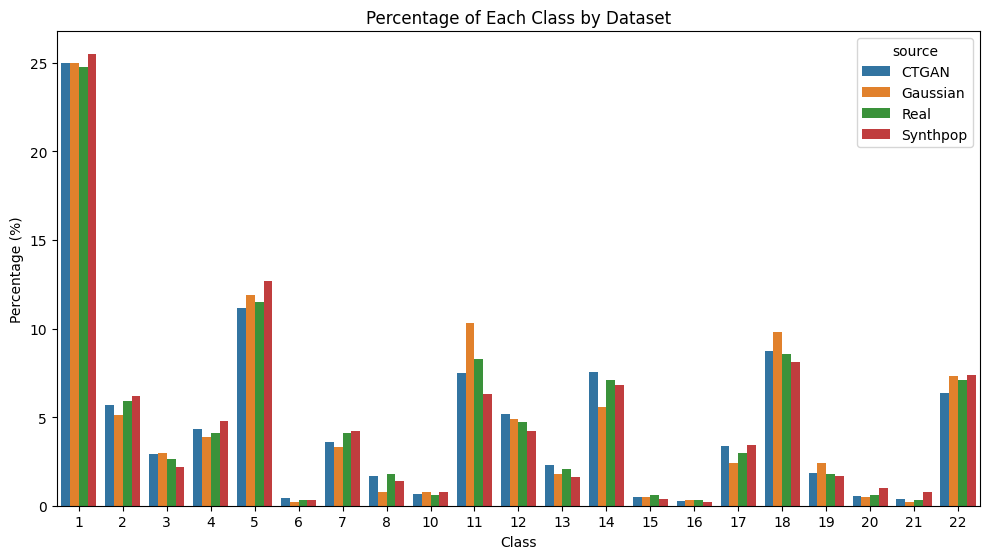

In [50]:
# Add a column to identify the dataset source
synth_imbalance_ct["source"] = "CTGAN"
synth_imbalance_sp["source"] = "Synthpop"
synth_imbalance_ga["source"] = "Gaussian"
real["source"] = "Real"

# Concatenate the datasets
combined_df = pd.concat(
    [synth_imbalance_ct, synth_imbalance_sp, synth_imbalance_ga, real]
)

# Group by 'category' and 'source' to get the counts for each category in each dataset
category_counts = (
    combined_df.groupby(["class", "source"]).size().reset_index(name="counts")
)

# Calculate the total counts per dataset (source)
total_counts_per_source = (
    category_counts.groupby("source")["counts"].sum().reset_index(name="total_counts")
)

# Merge total counts with the original category counts
category_counts = category_counts.merge(total_counts_per_source, on="source")

# Calculate the percentage of each category within each dataset
category_counts["percentage"] = (
    category_counts["counts"] / category_counts["total_counts"]
) * 100

# Create the plot
plt.figure(figsize=(10, 6))

# Plot percentages with seaborn
sns.barplot(x="class", y="percentage", hue="source", data=category_counts)

# Add labels and title
plt.xlabel("Class")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Each Class by Dataset")

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjusts layout, leaving space for the legend
plt.savefig("Viz/imbalance.png")
plt.show()
